## Techniques and Algorithms
* Partitional (K-means)
* Hierarchical (Hierarchical Agglomerative Clustering)
* Density (DBScan)
* Self-organizing (SOM)

## Evaluation Metrics
* V-Measure Score (Homogeneity and Completeness)
* Silhouette Score
* Adjusted Rand Index (ARI)

## Dataset

In this lesson we will use the Iris dataset to demonstrate the operation of the algorithms.

* Iris dataset (info)
    * 150 samples
    * 3 classes (setosa, veriscolor, virgínica)
    * https://archive.ics.uci.edu/ml/machine-learning-databases/iris/

In [3]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data[:, :]
y = iris.target

### Visualization dataset

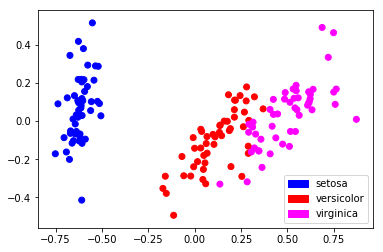

In [51]:
label_name = iris.target_names

from sklearn.decomposition import PCA
data = PCA(n_components=2).fit_transform(X)

color_label = {'setosa': 'blue', 'versicolor': 'red', 'virginica': 'magenta'}
y_label = [label_name[x] for x in y]
label_color = [color_label[x] for x in y_label]

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


plt.scatter(data[:, 0], data[:, 1], c=label_color)
team_patches = [mpatches.Patch(color=color, label=team) for team, color in color_label.items()]
plt.legend(handles=team_patches)

## K-means

* O algoritmo K-means é um método de clustering que tem por objetivo particionar n pontos de dados em k grupos;
* Cada ponto de dados pertence a um grupo. A atribuição de um ponto para um grupo pode ser dada por medidas de si/dissimilaridade (e.g. distância euclidiana), que busca calcular a distância entre um ponto e o centróide de cada grupo;
* Esse algoritmo requer um número k de clusters;
* Inicialmente é selecionado k pontos aleatórios como centróides de cada grupo;
* O algoritmo calcula a distância de cada ponto com todos os centróides, ao final dessa iteração os centróides de cada grupo serão recalculados;
* O novo centróide do grupo será calculado com base na média de todos os pontos atribuídos a ele;
* Esse processo é iterativo e converge quando nenhum ponto mudar de cluster.

In [69]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0, n_init=20)
kmeans.fit(X)
y_pred = kmeans.labels_

"""
Some parameters:

n_clusters : int, optional, default: 8
The number of clusters to form as well as the number of centroids to generate.

init : {‘k-means++’, ‘random’ or an ndarray}
Method for initialization, defaults to ‘k-means++’:

‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.

‘random’: choose k observations (rows) at random from data for the initial centroids.

If an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.

n_init : int, default: 10
Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
"""

'\nSome parameters:\n\nn_clusters : int, optional, default: 8\nThe number of clusters to form as well as the number of centroids to generate.\n\ninit : {‘k-means++’, ‘random’ or an ndarray}\nMethod for initialization, defaults to ‘k-means++’:\n\n‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. See section Notes in k_init for more details.\n\n‘random’: choose k observations (rows) at random from data for the initial centroids.\n\nIf an ndarray is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.\n\nn_init : int, default: 10\nNumber of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.\n'

#### Visualizando resultados do agrupamento (K-means)

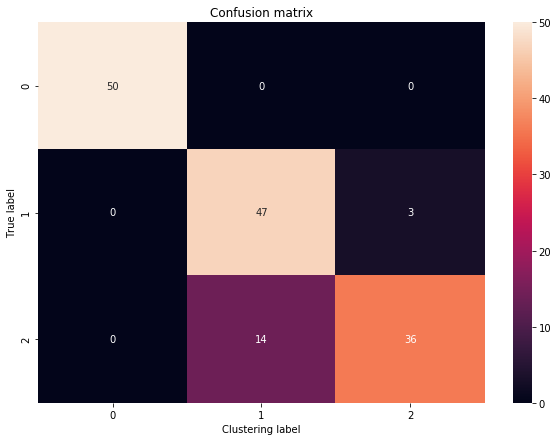

In [70]:
import sklearn.metrics
import seaborn as sns
confusion_matrix = sklearn.metrics.confusion_matrix(y, y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix, annot=True)
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Clustering label')
plt.show()

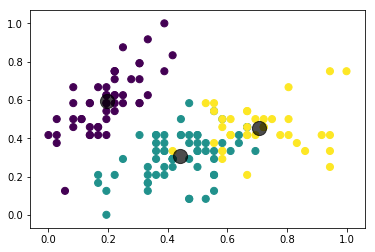

In [76]:
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7);